In [1]:
import kagglehub

path = kagglehub.dataset_download("simonezappatini/body-fat-extended-dataset")

print("Path to dataset files:", path)
#imports data set and provides path

Path to dataset files: /home/troyejac/.cache/kagglehub/datasets/simonezappatini/body-fat-extended-dataset/versions/2


In [2]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("Path to dataset files:", path)
files = os.listdir(path)
print("Files in dataset directory:", files)

csv_file = os.path.join(path, "BodyFat - Extended.csv") 
print("Path to the CSV file:", csv_file)

df = pd.read_csv(csv_file)
#opens data set

df = df.drop(columns=["Original"])

new_column_names = [
    "body fat",
    "Sex",
    "Age (years)",
    "Weight (lbs)",
    "Height (inches)",
    "Neck circumference (cm)",
    "Chest circumference (cm)",
    "Abdomen 2 circumference (cm)",
    "Hip circumference (cm)",
    "Thigh circumference (cm)",
    "Knee circumference (cm)",
    "Ankle circumference (cm)",
    "Biceps (extended) circumference (cm)",
    "Forearm circumference (cm)",
    "Wrist circumference (cm)"
]
df.columns = new_column_names
df["Weight (lbs)"]=df["Weight (lbs)"]*2.205
df["Height (inches)"]=df["Height (inches)"]*39.37007874




df['Sex_Male'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)
df['Sex_Female'] = df['Sex'].apply(lambda x: 1 if x == 'F' else 0)

df = df.drop('Sex', axis=1)
#drops columns that won't be used converts units to more comfortable ones and one hot encodes the Sex feature as to not confuse model


Path to dataset files: /home/troyejac/.cache/kagglehub/datasets/simonezappatini/body-fat-extended-dataset/versions/2
Files in dataset directory: ['BodyFat - Extended.csv']
Path to the CSV file: /home/troyejac/.cache/kagglehub/datasets/simonezappatini/body-fat-extended-dataset/versions/2/BodyFat - Extended.csv


# Data Analysis and Cleaning

In [6]:
df.head()

,body fat,Age (years),Weight (lbs),Height (inches),Neck circumference (cm),Chest circumference (cm),Abdomen 2 circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Biceps (extended) circumference (cm),Forearm circumference (cm),Wrist circumference (cm),Sex_Male,Sex_Female
0,12.3,23,154.28385,67.716535,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1,0
1,6.1,22,173.29095,72.440945,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1,0
2,25.3,22,154.01925,66.141732,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1,0
3,10.4,26,184.77900,72.440945,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1,0
4,28.7,24,184.29390,71.259843,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1,0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   body fat                              436 non-null    float64
 1   Age (years)                           436 non-null    int64  
 2   Weight (lbs)                          436 non-null    float64
 3   Height (inches)                       436 non-null    float64
 4   Neck circumference (cm)               436 non-null    float64
 5   Chest circumference (cm)              436 non-null    float64
 6   Abdomen 2 circumference (cm)          436 non-null    float64
 7   Hip circumference (cm)                436 non-null    float64
 8   Thigh circumference (cm)              436 non-null    float64
 9   Knee circumference (cm)               436 non-null    float64
 10  Ankle circumference (cm)              436 non-null    float64
 11  Biceps (extended) c

In [8]:
df.describe()

,body fat,Age (years),Weight (lbs),Height (inches),Neck circumference (cm),Chest circumference (cm),Abdomen 2 circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Biceps (extended) circumference (cm),Forearm circumference (cm),Wrist circumference (cm),Sex_Male,Sex_Female
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,34.545872,159.382257,68.269604,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908,0.577982,0.422018
std,7.502125,15.500099,34.098928,3.872398,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291,0.494449,0.494449
min,0.000000,1.000000,93.017484,29.527559,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000,0.000000,0.000000
25%,15.022500,21.000000,132.024816,65.700000,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000,0.000000,0.000000
50%,20.500000,28.500000,156.148839,68.110236,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000,1.000000,0.000000
75%,25.410000,46.000000,179.839800,70.866142,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000,1.000000,1.000000
max,47.500000,81.000000,363.207600,77.559055,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,1.000000,1.000000


In [9]:
df = df[df["Age (years)"] >= 16]
df = df[df["body fat"] >= 1]
# removes outliers and those that I don't want my model to apply to

In [10]:
df.describe()

,body fat,Age (years),Weight (lbs),Height (inches),Neck circumference (cm),Chest circumference (cm),Abdomen 2 circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Biceps (extended) circumference (cm),Forearm circumference (cm),Wrist circumference (cm),Sex_Male,Sex_Female
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,20.326905,34.609700,159.603571,68.284948,35.260046,94.217783,82.888915,98.706005,56.079908,37.380139,22.356120,29.917321,26.492379,17.145727,0.577367,0.422633
std,7.398456,15.467487,34.106107,3.879451,3.849627,10.938703,14.675957,6.872440,6.192898,2.768970,1.783324,3.948875,3.163370,1.585462,0.494549,0.494549
min,3.000000,18.000000,93.017484,29.527559,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000,0.000000,0.000000
25%,15.040000,21.000000,132.024816,65.748031,31.500000,85.500000,70.000000,94.200000,51.500000,35.500000,21.000000,27.000000,23.700000,16.000000,0.000000,0.000000
50%,20.500000,28.000000,156.532950,68.110236,35.500000,93.100000,83.000000,98.300000,56.000000,37.500000,22.300000,29.800000,26.700000,17.400000,1.000000,0.000000
75%,25.400000,46.000000,180.038250,70.866142,38.300000,101.500000,93.300000,102.500000,60.000000,39.000000,23.300000,32.700000,29.200000,18.400000,1.000000,1.000000
max,47.500000,81.000000,363.207600,77.559055,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,1.000000,1.000000


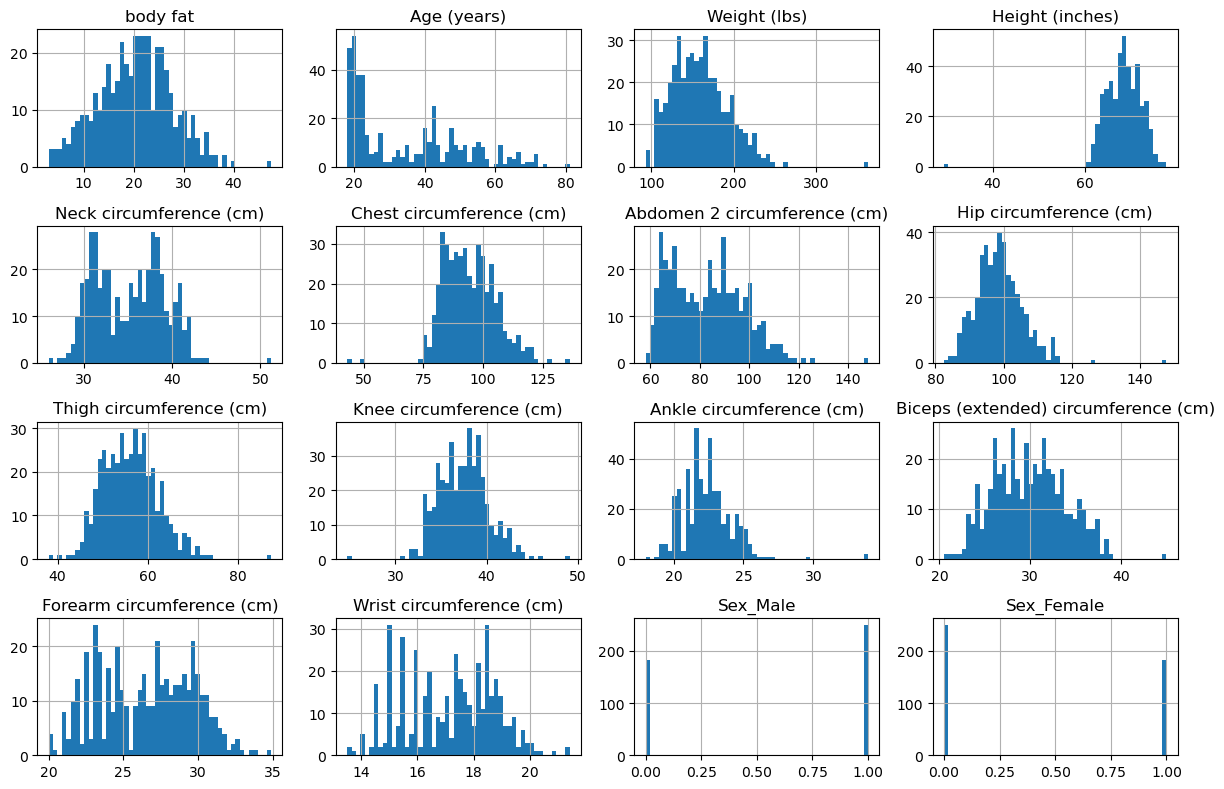

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop(['body fat'], axis=1)
y = df['body fat']

numerical_columns = [
    "Age (years)", "Weight (lbs)", "Height (inches)", 
    "Neck circumference (cm)", "Chest circumference (cm)", 
    "Abdomen 2 circumference (cm)", "Hip circumference (cm)", 
    "Thigh circumference (cm)", "Knee circumference (cm)", 
    "Ankle circumference (cm)", "Biceps (extended) circumference (cm)", 
    "Forearm circumference (cm)", "Wrist circumference (cm)"
]

x_normalized = x.copy()
scaler = StandardScaler()
x_normalized[numerical_columns] = scaler.fit_transform(x[numerical_columns])
#normalizes all features except gender 

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=51803)
#splits into test and training sets at 80-20

In [13]:
x_train_df = pd.DataFrame(x_train, columns=x.columns)
x_train_df.head()

,Age (years),Weight (lbs),Height (inches),Neck circumference (cm),Chest circumference (cm),Abdomen 2 circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Biceps (extended) circumference (cm),Forearm circumference (cm),Wrist circumference (cm),Sex_Male,Sex_Female
321,-0.880909,-0.956350,-0.202569,-0.977860,-0.816194,-1.152119,-0.248526,-1.063722,-1.041351,0.361474,-0.993157,-0.947041,-1.039212,0,1
326,-0.686729,-0.985710,-0.460636,-0.977860,-0.797889,-1.063436,-0.248526,-0.497904,-1.402914,0.080774,-1.119922,-0.630556,-0.534043,0,1
260,-0.945635,-1.132508,-0.667089,-1.289939,-1.072461,-1.070258,-1.384807,-1.063722,-0.679788,-0.761325,-1.500216,-1.738251,-1.102358,0,1
48,0.672528,-0.699207,0.056514,-0.639774,-0.175524,0.034865,-1.209994,-0.659566,-0.571319,-0.985884,-0.283274,-0.314072,-0.534043,1,0
41,0.607802,1.333836,-10.001988,0.348476,1.078359,1.460610,2.446500,2.347348,1.851152,0.754453,0.933668,0.698677,0.160563,1,0


In [14]:
x_train_df.describe()

,Age (years),Weight (lbs),Height (inches),Neck circumference (cm),Chest circumference (cm),Abdomen 2 circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Biceps (extended) circumference (cm),Forearm circumference (cm),Wrist circumference (cm),Sex_Male,Sex_Female
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.013290,0.002820,0.025730,0.011744,-0.010330,-0.000111,-0.009422,-0.002405,-0.005463,0.030800,0.000225,0.003510,0.023686,0.583815,0.416185
std,1.009198,1.005863,1.029541,1.002810,1.012104,0.997450,0.994901,0.976589,1.021142,1.014650,0.997071,0.999022,0.995309,0.493639,0.493639
min,-1.075088,-1.954580,-10.001988,-2.408222,-4.687670,-1.697859,-2.142327,-2.518680,-4.584667,-1.996403,-2.134040,-2.054736,-2.302132,0.000000,0.000000
25%,-0.880909,-0.809552,-0.654694,-0.964857,-0.797889,-0.879249,-0.641854,-0.740397,-0.752101,-0.592905,-0.790333,-0.860008,-0.723482,0.000000,0.000000
50%,-0.363096,-0.101463,-0.045087,0.062404,-0.116033,-0.006066,-0.059146,-0.037167,0.007181,-0.031506,-0.055097,0.081533,0.160563,1.000000,0.000000
75%,0.801981,0.640135,0.750957,0.816595,0.693957,0.780141,0.552698,0.565024,0.585682,0.586033,0.724506,0.856919,0.839383,1.000000,1.000000
max,3.002683,5.976629,2.393337,4.145439,3.842392,4.448536,7.137301,5.047105,4.237466,6.480724,3.823906,2.660880,2.686405,1.000000,1.000000


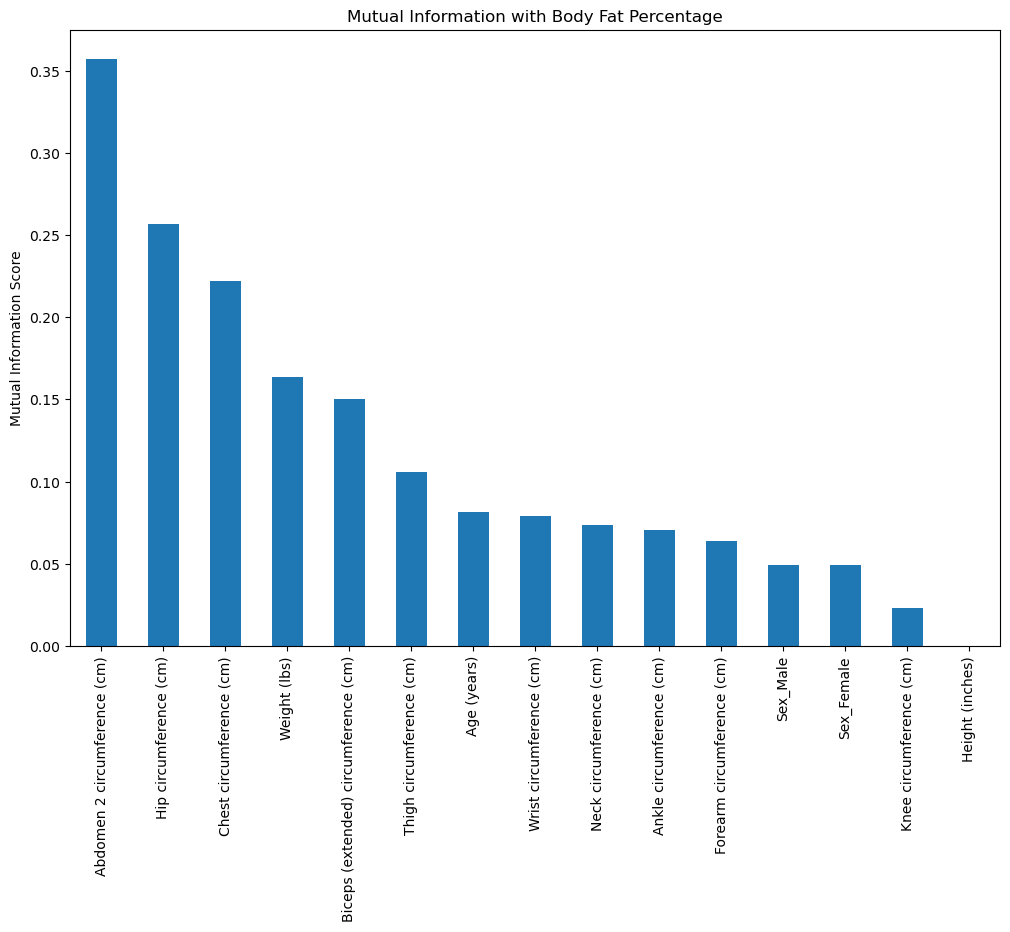

In [15]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Compute mutual information
mi = mutual_info_regression(x_train, y_train)
mi_series = pd.Series(mi, index=x.columns).sort_values(ascending=False)

# Plot mutual information
mi_series.plot(kind='bar', figsize=(12, 8), title="Mutual Information with Body Fat Percentage")
plt.ylabel("Mutual Information Score")
plt.show()

In [16]:
x_train

,Age (years),Weight (lbs),Height (inches),Neck circumference (cm),Chest circumference (cm),Abdomen 2 circumference (cm),Hip circumference (cm),Thigh circumference (cm),Knee circumference (cm),Ankle circumference (cm),Biceps (extended) circumference (cm),Forearm circumference (cm),Wrist circumference (cm),Sex_Male,Sex_Female
321,-0.880909,-0.956350,-0.202569,-0.977860,-0.816194,-1.152119,-0.248526,-1.063722,-1.041351,0.361474,-0.993157,-0.947041,-1.039212,0,1
326,-0.686729,-0.985710,-0.460636,-0.977860,-0.797889,-1.063436,-0.248526,-0.497904,-1.402914,0.080774,-1.119922,-0.630556,-0.534043,0,1
260,-0.945635,-1.132508,-0.667089,-1.289939,-1.072461,-1.070258,-1.384807,-1.063722,-0.679788,-0.761325,-1.500216,-1.738251,-1.102358,0,1
48,0.672528,-0.699207,0.056514,-0.639774,-0.175524,0.034865,-1.209994,-0.659566,-0.571319,-0.985884,-0.283274,-0.314072,-0.534043,1,0
41,0.607802,1.333836,-10.001988,0.348476,1.078359,1.460610,2.446500,2.347348,1.851152,0.754453,0.933668,0.698677,0.160563,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.543075,1.201795,0.869322,0.686562,1.188188,1.378749,0.989729,2.056357,0.332588,0.754453,0.553374,0.761974,0.981462,1,0
384,-0.945635,-0.809552,-0.847735,-1.289939,-0.935175,-0.879249,0.625537,-1.354713,-0.860570,-1.322724,-0.486098,-1.200228,-1.354942,0,1
126,0.478348,0.526056,0.158115,0.946628,0.410232,0.628357,-0.030010,0.746894,-0.209757,-0.087646,0.984374,1.205052,0.034271,1,0
208,0.801981,0.027018,0.462918,0.192437,0.510908,0.068974,-1.006046,-0.497904,-0.426694,0.080774,0.375903,0.318896,0.350001,1,0


In [17]:
import numpy as np
np.savetxt('../data/x_train.csv', x_train, delimiter=',')
np.savetxt('../data/x_test.csv', x_test, delimiter=',')
np.savetxt('../data/y_train.csv', y_train, delimiter=',')
np.savetxt('../data/y_test.csv', y_test, delimiter=',')